# Project

## 1. Processing data 

In [1]:
pwd()

'/Users/mac'

In [2]:
import pandas as pd
import numpy as np

In [3]:
df = pd.read_csv('/Users/mac/Downloads/Financial Distress 2.csv')

In [4]:
df.head()

,Company,Time,Financial Distress,x1,x2,x3,x4,x5,x6,x7,...,x74,x75,x76,x77,x78,x79,x80,x81,x82,x83
0,1,1,0.010636,1.2810,0.022934,0.87454,1.21640,0.060940,0.188270,0.52510,...,85.437,27.07,26.102,16.000,16.0,0.2,22,0.060390,30,49
1,1,2,-0.455970,1.2700,0.006454,0.82067,1.00490,-0.014080,0.181040,0.62288,...,107.090,31.31,30.194,17.000,16.0,0.4,22,0.010636,31,50
2,1,3,-0.325390,1.0529,-0.059379,0.92242,0.72926,0.020476,0.044865,0.43292,...,120.870,36.07,35.273,17.000,15.0,-0.2,22,-0.455970,32,51
3,1,4,-0.566570,1.1131,-0.015229,0.85888,0.80974,0.076037,0.091033,0.67546,...,54.806,39.80,38.377,17.167,16.0,5.6,22,-0.325390,33,52
4,2,1,1.357300,1.0623,0.107020,0.81460,0.83593,0.199960,0.047800,0.74200,...,85.437,27.07,26.102,16.000,16.0,0.2,29,1.251000,7,27


In [5]:
df.tail()

,Company,Time,Financial Distress,x1,x2,x3,x4,x5,x6,x7,...,x74,x75,x76,x77,x78,x79,x80,x81,x82,x83
3667,422,10,0.43802,2.2605,0.20289,0.16037,0.18588,0.17597,0.19840,2.2236,...,100.0,100.0,100.0,17.125,14.5,-7.0,37,0.43638,4,41
3668,422,11,0.48241,1.9615,0.21644,0.20095,0.21642,0.20359,0.18987,1.9382,...,91.5,130.5,132.4,20.000,14.5,-16.0,37,0.43802,5,42
3669,422,12,0.50077,1.7099,0.20797,0.26136,0.21399,0.19367,0.18389,1.6898,...,87.1,175.9,178.1,20.000,14.5,-20.2,37,0.48241,6,43
3670,422,13,0.61103,1.5590,0.18545,0.30728,0.19307,0.17214,0.17068,1.5389,...,92.9,203.2,204.5,22.000,22.0,6.4,37,0.50077,7,44
3671,422,14,0.51865,1.6148,0.17676,0.36369,0.18442,0.16955,0.19786,1.5842,...,91.7,227.5,214.5,21.000,20.5,8.6,37,0.61103,8,45


In [6]:
df.shape

(3672, 86)

In [7]:
df.describe

<bound method NDFrame.describe of       Company  Time  Financial Distress        x1        x2        x3  \
0           1     1            0.010636   1.28100  0.022934  0.874540   
1           1     2           -0.455970   1.27000  0.006454  0.820670   
2           1     3           -0.325390   1.05290 -0.059379  0.922420   
3           1     4           -0.566570   1.11310 -0.015229  0.858880   
4           2     1            1.357300   1.06230  0.107020  0.814600   
5           2     2            0.007188   1.05580  0.081916  0.879490   
6           2     3            1.200200   0.97059  0.076064  0.906770   
7           2     4            2.234800   1.05900  0.130200  0.818110   
8           2     5            1.340500   1.12450  0.147840  0.758710   
9           2     6            2.047400   1.59980  0.262460  0.546150   
10          2     7            2.345900   1.57560  0.262100  0.564480   
11          2     8            2.249900   1.54430  0.240910  0.590730   
12          2    

In [8]:
df.isnull().values.any() # check any NA values 

False

In [9]:
df['Financial Distress'] = np.where(df['Financial Distress']>-0.5 , 0, 1)

In [10]:
print(df.Company.unique().shape)
print(df.x80.unique().shape)

(422,)
(37,)


## 2. Split data 

In [11]:
X = df.loc[:, 'x1':].values 
y = df.loc[:, 'Financial Distress'].values 

In [12]:
print([len(y), y.sum()])

[3672, 136]


In [13]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = \
    train_test_split(X, y, 
                     test_size=0.20,
                     stratify=y,
                     random_state=1)

### 3. Run all Classifiers 

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

import warnings
warnings.filterwarnings("ignore")

from sklearn.linear_model import Perceptron, LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier

from sklearn.model_selection import cross_val_score

names = [ "Perceptron",
         "LogisticRegression",
         "Linear SVM", 
         "Decision Tree", 
         "Random Forest", 
         "RBF SVM",          
         "Neural Net", 
         "Naive Bayes",  
         "Nearest Neighbors"
            ] 

classifiers = [ 
    Perceptron(),
    LogisticRegression(penalty='l2', 
                          C=0.001,
                          random_state=1),
    SVC(kernel="linear", C=1),
    DecisionTreeClassifier(max_depth=5),
    RandomForestClassifier(max_depth=5, n_estimators=100, max_features=1),
    SVC(kernel='rbf',gamma=2, C=1),
    MLPClassifier(hidden_layer_sizes=(100,50), alpha=1),
    GaussianNB(),
    KNeighborsClassifier(5)
                 ]

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                            test_size=0.3, 
                            random_state=0)

    
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
    
    
for name, clf in zip(names, classifiers):
    pipe = Pipeline( [ ('scl', StandardScaler()),
                   ('clf', clf)])
    pipe.fit(X_train, y_train)
    score = pipe.score(X_test, y_test)


    print("Algo: {0:<20s} and Score: {1:0.4f}".format(name, score))





Algo: Perceptron           and Score: 0.9574
Algo: LogisticRegression   and Score: 0.9610
Algo: Linear SVM           and Score: 0.9619
Algo: Decision Tree        and Score: 0.9528
Algo: Random Forest        and Score: 0.9628
Algo: RBF SVM              and Score: 0.9637
Algo: Neural Net           and Score: 0.9601
Algo: Naive Bayes          and Score: 0.3258
Algo: Nearest Neighbors    and Score: 0.9646


### Ensemble classifiers 

In [15]:
from sklearn.base import BaseEstimator
from sklearn.base import ClassifierMixin
from sklearn.preprocessing import LabelEncoder
from sklearn.externals import six
from sklearn.base import clone
from sklearn.pipeline import _name_estimators
import numpy as np
import operator


class MajorityVoteClassifier(BaseEstimator, 
                             ClassifierMixin):
    """ A majority vote ensemble classifier

    Parameters
    ----------
    classifiers : array-like, shape = [n_classifiers]
      Different classifiers for the ensemble

    vote : str, {'classlabel', 'probability'} (default='label')
      If 'classlabel' the prediction is based on the argmax of
        class labels. Else if 'probability', the argmax of
        the sum of probabilities is used to predict the class label
        (recommended for calibrated classifiers).

    weights : array-like, shape = [n_classifiers], optional (default=None)
      If a list of int or float values are provided, the classifiers
      are weighted by importance; Uses uniform weights if weights=None.

    """
    def __init__(self, classifiers, vote='classlabel', weights=None):

        self.classifiers = classifiers
        self.named_classifiers = {key: value for key, value
                                  in _name_estimators(classifiers)}
        self.vote = vote
        self.weights = weights

    def fit(self, X, y):
        """ Fit classifiers.

        Parameters
        ----------
        X : {array-like, sparse matrix}, shape = [n_samples, n_features]
            Matrix of training samples.

        y : array-like, shape = [n_samples]
            Vector of target class labels.

        Returns
        -------
        self : object

        """
        if self.vote not in ('probability', 'classlabel'):
            raise ValueError("vote must be 'probability' or 'classlabel'"
                             "; got (vote=%r)"
                             % self.vote)

        if self.weights and len(self.weights) != len(self.classifiers):
            raise ValueError('Number of classifiers and weights must be equal'
                             '; got %d weights, %d classifiers'
                             % (len(self.weights), len(self.classifiers)))

        # Use LabelEncoder to ensure class labels start with 0, which
        # is important for np.argmax call in self.predict
        self.lablenc_ = LabelEncoder()
        self.lablenc_.fit(y)
        self.classes_ = self.lablenc_.classes_
        self.classifiers_ = []
        for clf in self.classifiers:
            fitted_clf = clone(clf).fit(X, self.lablenc_.transform(y))
            self.classifiers_.append(fitted_clf)
        return self

    def predict(self, X):
        """ Predict class labels for X.

        Parameters
        ----------
        X : {array-like, sparse matrix}, shape = [n_samples, n_features]
            Matrix of training samples.

        Returns
        ----------
        maj_vote : array-like, shape = [n_samples]
            Predicted class labels.
            
        """
        if self.vote == 'probability':
            maj_vote = np.argmax(self.predict_proba(X), axis=1)
        else:  # 'classlabel' vote

            #  Collect results from clf.predict calls
            predictions = np.asarray([clf.predict(X)
                                      for clf in self.classifiers_]).T

            maj_vote = np.apply_along_axis(
                                      lambda x:
                                      np.argmax(np.bincount(x,
                                                weights=self.weights)),
                                      axis=1,
                                      arr=predictions)
        maj_vote = self.lablenc_.inverse_transform(maj_vote)
        return maj_vote

    def predict_proba(self, X):
        """ Predict class probabilities for X.

        Parameters
        ----------
        X : {array-like, sparse matrix}, shape = [n_samples, n_features]
            Training vectors, where n_samples is the number of samples and
            n_features is the number of features.

        Returns
        ----------
        avg_proba : array-like, shape = [n_samples, n_classes]
            Weighted average probability for each class per sample.

        """
        probas = np.asarray([clf.predict_proba(X)
                             for clf in self.classifiers_])
        avg_proba = np.average(probas, axis=0, weights=self.weights)
        return avg_proba

    def get_params(self, deep=True):
        """ Get classifier parameter names for GridSearch"""
        if not deep:
            return super(MajorityVoteClassifier, self).get_params(deep=False)
        else:
            out = self.named_classifiers.copy()
            for name, step in six.iteritems(self.named_classifiers):
                for key, value in six.iteritems(step.get_params(deep=True)):
                    out['%s__%s' % (name, key)] = value
            return out


In [27]:
import numpy as np
from sklearn.linear_model import Perceptron, LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier

from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score


clf1 = KNeighborsClassifier(n_neighbors=10,
                            p=2,
                            metric='minkowski')
clf2 = SVC(kernel="linear", C=1,probability=True)
clf3 = RandomForestClassifier(max_depth=5, n_estimators=100, max_features=1)

pipe1 = Pipeline([['sc', StandardScaler()],
                  ['clf', clf1]])
pipe2 = Pipeline([['sc', StandardScaler()],
                  ['clf', clf2]])


clf_labels = ['KNN','Linear SVM','Random Forest']

print('10-fold cross validation:\n')

for clf, label in zip([pipe1, pipe2, clf3],clf_labels):
    scores = cross_val_score(estimator=clf,
                             X=X_train,
                             y=y_train,
                             cv=10,
                             scoring='roc_auc')
    print("ROC AUC: %0.2f (+/- %0.2f) [%s]"
          % (scores.mean(), scores.std(), label))

10-fold cross validation:

ROC AUC: 0.75 (+/- 0.09) [KNN]
ROC AUC: 0.87 (+/- 0.04) [Linear SVM]
ROC AUC: 0.92 (+/- 0.04) [Random Forest]


In [28]:
mv_clf = MajorityVoteClassifier(classifiers=[pipe1, pipe2, clf3])

clf_labels += ['Majority voting']

                              #### fix here
all_clf = [pipe1, pipe2, clf3, mv_clf]

for clf, label in zip(all_clf, clf_labels):
    scores = cross_val_score(estimator=clf,
                             X=X_train,
                             y=y_train,
                             cv=10,
                             scoring='roc_auc')
    print("ROC AUC: %0.2f (+/- %0.2f) [%s]"
          % (scores.mean(), scores.std(), label))

ROC AUC: 0.75 (+/- 0.09) [KNN]
ROC AUC: 0.87 (+/- 0.04) [Linear SVM]
ROC AUC: 0.91 (+/- 0.05) [Random Forest]
ROC AUC: 0.90 (+/- 0.04) [Majority voting]


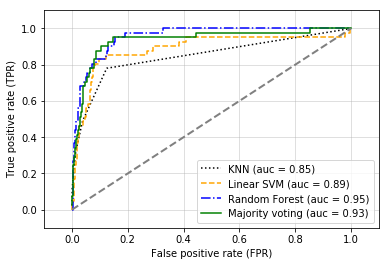

In [29]:
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

colors = ['black', 'orange', 'blue', 'green']   
linestyles = [':', '--', '-.', '-']            
for clf, label, clr, ls \
        in zip(all_clf,
               clf_labels, colors, linestyles):

    y_pred = clf.fit(X_train,
                     y_train).predict_proba(X_test)[:, 1]   

    fpr, tpr, thresholds = roc_curve(y_true=y_test,
                                     y_score=y_pred)
    roc_auc = auc(x=fpr, y=tpr)
    plt.plot(fpr, tpr,
             color=clr,
             linestyle=ls,
             label='%s (auc = %0.2f)' % (label, roc_auc))

plt.legend(loc='lower right')
plt.plot([0, 1], [0, 1],
         linestyle='--',
         color='gray',
         linewidth=2)

plt.xlim([-0.1, 1.1])
plt.ylim([-0.1, 1.1])
plt.grid(alpha=0.5)
plt.xlabel('False positive rate (FPR)')
plt.ylabel('True positive rate (TPR)')


#plt.savefig('images/07_04', dpi=300)
plt.show()